In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.6 MB/s eta 0:00:00


In [3]:
pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.2 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2023 December

In [6]:
# Define the file path to the CSV file located in Google Drive
path = "/content/drive/MyDrive/diploma/2023_dec_raw.csv"

# Read the CSV file into a pandas DataFrame, using a comma as the separator
dou_2023_dec = pd.read_csv(path, sep=',')

# Display a summary of the DataFrame, including column names, data types, and non-null counts
dou_2023_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 31 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Timestamp                                                                       12074 non-null  object 
 1   Ваша основна зайнятість в ІТ зараз...                                           12074 non-null  object 
 2   Зарплата / дохід у $$$ за місяць, лише ставка 
ЧИСТИМИ - після сплати податків  12074 non-null  float64
 3   Оберіть вашу основну посаду                                                     12074 non-null  object 
 4   Ваш тайтл на цій посаді                                                         12074 non-null  object 
 5   Вкажіть вашу спеціалізацію - Game Design                                        65 non-null     object 
 6   Вкажіть вашу с

In [7]:
# Renaming columns to standart names
dou_2023_dec.rename(columns={
    'Timestamp': 'timestamp',
    'Ваша основна зайнятість в ІТ зараз...': 'employmentType',
    'Зарплата / дохід у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків': 'salary',
    'Оберіть вашу основну посаду': 'mainPosition',
    'Ваш тайтл на цій посаді': 'jobTitle',
    'Вкажіть вашу спеціалізацію - Game Design': 'specializationGameDesign',
    'Вкажіть вашу спеціалізацію - Sound': 'specializationSound',
    'Вкажіть вашу спеціалізацію - QA': 'specializationQA',
    'Оберіть вашу посаду - Design': 'positionDesign',
    'GameDev розробники - оберіть вашу спеціалізацію': 'specializationGameDev',
    'Ваша посада - Marketing': 'positionMarketing',
    'Оберіть вашу посаду - HR': 'positionHR',
    'Ваша посада - PM': 'positionPM',
    'Ваша посада - Analyst': 'positionAnalyst',
    'Ваша посада - DS': 'positionDS',
    'Ваша посада - DevOps': 'positionDevOps',
    'Ваша посада - Top management': 'positionTopManagement',
    'Ваша спеціалізація - Support': 'specializationSupport',
    'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 'usesProgrammingLanguages',
    'Основна мова програмування': 'mainProgrammingLanguage',
    'Вкажіть вашу основну спеціалізацію': 'mainSpecialization',
    'В якій сфері проєкт, в якому ви зараз працюєте?': 'projectDomain',
    'Основний напрям роботи компанії, в якій працюєте': 'companyMainArea',
    'Кількість спеціалістів у вашій компанії (в Україні/з України)': 'companySizeUA',
    'Загальний стаж роботи за нинішньою ІТ-спеціальністю': 'experience',
    'Яка у вас освіта?': 'educationLevel',
    'Знання англійської мови': 'englishProficiency',
    'Де ви зараз живете? ': 'currentLocation',
    'В якій області ви зараз живете?': 'currentRegion',
    'Ваша стать': 'gender',
    'Ваш вік': 'age'
}, inplace=True)


In [8]:
dou_2023_dec.head()

,timestamp,employmentType,salary,mainPosition,jobTitle,specializationGameDesign,specializationSound,specializationQA,positionDesign,specializationGameDev,...,projectDomain,companyMainArea,companySizeUA,experience,educationLevel,englishProficiency,currentLocation,currentRegion,gender,age
0,12/4/2023 9:07:12,Працюю full-time в ІТ-компанії чи ІТ-відділі,4500.0,Software Engineer / Programmer,Senior,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,до 1000,6.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,28
1,12/4/2023 9:07:50,Працюю full-time в ІТ-компанії чи ІТ-відділі,7000.0,"Data Science, Machine Learning, AI, Big Data, ...",Tech Lead,NaN,NaN,NaN,NaN,NaN,...,"Big Data, Data Science, Gambling",Продуктова,до 1000,5.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,36
2,12/4/2023 9:08:11,Працюю full-time в ІТ-компанії чи ІТ-відділі,1750.0,Software Engineer / Programmer,Junior,NaN,NaN,NaN,NaN,NaN,...,Insurance,Аутсорсингова,до 1000,2.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Харків чи область,Чоловік,34
3,12/4/2023 9:08:42,Працюю full-time в ІТ-компанії чи ІТ-відділі,3560.0,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Senior,NaN,NaN,Manual QA,NaN,NaN,...,"E-commerce, Legal, Public services / Government",Продуктова,до 1000,6.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Львів чи область,Чоловік,37
4,12/4/2023 9:09:23,Працюю full-time в ІТ-компанії чи ІТ-відділі,2750.0,Software Engineer / Programmer,Senior,NaN,NaN,NaN,NaN,NaN,...,Retail,Продуктова,до 1000,3.0,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,34


In [9]:
dou_2023_dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 12074 non-null  object 
 1   employmentType            12074 non-null  object 
 2   salary                    12074 non-null  float64
 3   mainPosition              12074 non-null  object 
 4   jobTitle                  12074 non-null  object 
 5   specializationGameDesign  65 non-null     object 
 6   specializationSound       2 non-null      object 
 7   specializationQA          2205 non-null   object 
 8   positionDesign            478 non-null    object 
 9   specializationGameDev     241 non-null    object 
 10  positionMarketing         252 non-null    object 
 11  positionHR                417 non-null    object 
 12  positionPM                752 non-null    object 
 13  positionAnalyst           430 non-null    object 
 14  positi

# 2024 June

In [10]:
# Define the file path to the CSV file in Google Drive
path = "/content/drive/MyDrive/diploma/2024_june_raw.csv"

# Load the CSV file into a pandas DataFrame, using a comma as the separator
dou_2024 = pd.read_csv(path, sep=',')

# Display the first five rows of the DataFrame to preview the data
dou_2024.head()

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід в ІТ у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків",Оберіть вашу основну посаду,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію - Game design,Вкажіть вашу спеціалізацію - Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду - Design,Оберіть вашу посаду - Art and Animation,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,В якій області ви зараз живете?,Ваша стать,Ваш вік (повних років),Де живуть
0,5/27/2024 9:30,Працюю full-time в ІТ-компанії чи ІТ-відділі,4700.0,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Retail,Аутстафінгова,5. до 1000,5.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",5. Upper-Intermediate,Львів чи область,Чоловік,24.0,В Україні
1,5/27/2024 9:30,Працюю full-time в ІТ-компанії чи ІТ-відділі,1700.0,"QA / AQA / QC Engineer (Junior, Middle, Senior...",Middle,NaN,NaN,Automation QA,NaN,NaN,...,Media,Сервісна (аутсорсингова),6. понад 1000,2.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",4. Intermediate,Київ чи область,Чоловік,31.0,В Україні
2,5/27/2024 9:30,Працюю full-time в ІТ-компанії чи ІТ-відділі,3500.0,Project/Product/Program/Delivery/Engineering M...,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,Blockchain,Продуктова,4. до 200,3.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",6. Advanced,Київ чи область,Жінка,26.0,В Україні
3,5/27/2024 9:31,Працюю full-time в ІТ-компанії чи ІТ-відділі,3100.0,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Mobile,Сервісна (аутсорсингова),5. до 1000,6.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",5. Upper-Intermediate,Тернопіль чи область,Чоловік,28.0,В Україні
4,5/27/2024 9:32,Працюю full-time в ІТ-компанії чи ІТ-відділі,7000.0,Project/Product/Program/Delivery/Engineering M...,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,"High Load Systems, Інша",Продуктова,3. до 50,2.0,"5. Вища (бакалавр, спеціаліст, магістр) - одна...",6. Advanced,Київ чи область,Чоловік,35.0,В Україні


In [11]:
dou_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11469 entries, 0 to 11468
Data columns (total 32 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Timestamp                                                                            11468 non-null  object 
 1   Ваша основна зайнятість в ІТ зараз...                                                11468 non-null  object 
 2   Зарплата / дохід в ІТ у $$$ за місяць, лише ставка 
ЧИСТИМИ - після сплати податків  11468 non-null  float64
 3   Оберіть вашу основну посаду                                                          11468 non-null  object 
 4   Ваш тайтл на цій посаді                                                              11468 non-null  object 
 5   Вкажіть вашу спеціалізацію - Game design                                             84 

In [12]:
# Renaming columns to standart names
dou_2024.rename(columns={
    'Timestamp': 'timestamp',
    'Ваша основна зайнятість в ІТ зараз...': 'employmentType',
    'Зарплата / дохід в ІТ у $$$ за місяць, лише ставка \nЧИСТИМИ - після сплати податків': 'salary',
    'Оберіть вашу основну посаду': 'mainPosition',
    'Ваш тайтл на цій посаді': 'jobTitle',
    'Вкажіть вашу спеціалізацію - Game design': 'specializationGameDesign',
    'Вкажіть вашу спеціалізацію - Sound': 'specializationSound',
    'Вкажіть вашу спеціалізацію - QA': 'specializationQA',
    'Оберіть вашу посаду - Design': 'positionDesign',
    'Якщо ви працюєте в GameDev,  оберіть вашу спеціалізацію': 'specializationGameDev',
    'Ваша посада - Marketing': 'positionMarketing',
    'Оберіть вашу посаду - HR': 'positionHR',
    'Ваша посада - PM': 'positionPM',
    'Ваша посада - Analyst': 'positionAnalyst',
    'Ваша посада - DS': 'positionDS',
    'Ваша посада- DevOps': 'positionDevOps',
    'Ваша посада - Top management': 'positionTopManagement',
    'Ваша спеціалізація - Support': 'specializationSupport',
    'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 'usesProgrammingLanguages',
    'Основна мова програмування': 'mainProgrammingLanguage',
    'Вкажіть вашу основну спеціалізацію': 'mainSpecialization',
    'В якій сфері проєкт, в якому ви зараз працюєте?': 'projectDomain',
    'Основний напрям роботи компанії, в якій працюєте': 'companyMainArea',
    'Кількість спеціалістів у вашій компанії (з України)': 'companySizeUA',
    'Загальний стаж роботи за нинішньою ІТ-спеціальністю': 'experience',
    'Яка у вас освіта?': 'educationLevel',
    'Знання англійської мови': 'englishProficiency',
    'Де живуть': 'currentLocation',
    'В якій області ви зараз живете?': 'currentRegion',
    'Ваша стать': 'gender',
    'Ваш вік (повних років)': 'age'
}, inplace=True)


In [13]:
# List of columns to remove
columns_to_drop = ['Ваша посада - C-level', 'Оберіть вашу посаду - Art and Animation']

# Dropping unused columns
dou_2024 = dou_2024.drop(columns=columns_to_drop)

# 2023 June

In [14]:
# Define the file path to the CSV file in Google Drive
path = "/content/drive/MyDrive/diploma/2023_june_raw.csv"

# Load the CSV file into a pandas DataFrame, using a semicolon as the separator
dou_2023_june = pd.read_csv(path, sep=';')

# Display a summary of the DataFrame, including column names, data types, and non-null counts
dou_2023_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 31 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Timestamp                                                                   14059 non-null  object
 1   Ваша основна зайнятість в ІТ зараз...                                       14059 non-null  object
 2   Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків         13970 non-null  object
 3   Спеціалізація                                                               13985 non-null  object
 4   Ваш тайтл на цій посаді                                                     13985 non-null  object
 5   Вкажіть вашу спеціалізацію Game Design                                      68 non-null     object
 6   Вкажіть вашу спеціалізацію Sound                      

In [15]:
# Renaming columns to standart names
dou_2023_june.rename(columns={
    'Timestamp': 'timestamp',
    'Ваша основна зайнятість в ІТ зараз...': 'employmentType',
    'Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків': 'salary',
    'Спеціалізація': 'mainPosition',#???
    'Ваш тайтл на цій посаді': 'jobTitle',
    'Вкажіть вашу спеціалізацію Game Design': 'specializationGameDesign',
    'Вкажіть вашу спеціалізацію Sound': 'specializationSound',
    'Вкажіть вашу спеціалізацію - QA': 'specializationQA',
    'Оберіть вашу посаду Designer / Artist': 'positionDesign',
    'Якщо ви працюєте в GameDev,  оберіть вашу спеціалізацію': 'specializationGameDev',
    'Ваша посада Marketing': 'positionMarketing',
    'Оберіть вашу посаду HR': 'positionHR',
    'Ваша посада - PM': 'positionPM',
    'Ваша посада Analyst': 'positionAnalyst',
    'Ваша посада Data Science': 'positionDS',
    'Ваша посада DevOps, SRE': 'positionDevOps',
    'Ваша посада Management': 'positionTopManagement',
    'Ваша спеціалізація Support': 'specializationSupport',
    'Чи використовуєте ви у своїй роботі мови програмування (одну чи декілька)?': 'usesProgrammingLanguages',
    'Основна мова програмування': 'mainProgrammingLanguage',
    'Вкажіть вашу основну спеціалізацію': 'mainSpecialization',
    'В якій сфері проєкт, в якому ви зараз працюєте?': 'projectDomain',
    'Основний напрям роботи компанії, в якій працюєте': 'companyMainArea',
    'Кількість спеціалістів у вашій компанії (в Україні/з України)': 'companySizeUA',
    'Загальний стаж роботи за нинішньою ІТ-спеціальністю': 'experience',
    'Яка у вас освіта?': 'educationLevel',
    'Знання англійської мови': 'englishProficiency',
    'Де ви зараз живете? ': 'currentLocation',
    'В якій області ви зараз живете?': 'currentRegion',
    'Ваша стать': 'gender',
    'Ваш вік': 'age'
}, inplace=True)
dou_2023_june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  14059 non-null  object
 1   employmentType             14059 non-null  object
 2   salary                     13970 non-null  object
 3   mainPosition               13985 non-null  object
 4   jobTitle                   13985 non-null  object
 5   specializationGameDesign   68 non-null     object
 6   specializationSound        4 non-null      object
 7   specializationQA           2762 non-null   object
 8   positionDesign             507 non-null    object
 9   specializationGameDev      268 non-null    object
 10  positionMarketing          292 non-null    object
 11  positionHR                 632 non-null    object
 12  positionTopManagement      894 non-null    object
 13  positionAnalyst            526 non-null    object
 14  positi

In [16]:
# Removing unused columns
columns_to_drop = ['Ваша посада CTO, Director']
dou_2023_june = dou_2023_june.drop(columns=columns_to_drop)

In [17]:
# Convert columns to numeric
dou_2023_june['salary'] = pd.to_numeric(dou_2023_june['salary'], errors='coerce')
dou_2023_june['age'] = pd.to_numeric(dou_2023_june['age'], errors='coerce')

# Merging datasets

In [26]:
print(dou_2023_dec.columns)
print(dou_2024.columns)
print(dou_2023_june.columns)

Index(['timestamp', 'employmentType', 'salary', 'mainPosition', 'jobTitle',
       'specializationGameDesign', 'specializationSound', 'specializationQA',
       'positionDesign', 'specializationGameDev', 'positionMarketing',
       'positionHR', 'positionPM', 'positionAnalyst', 'positionDS',
       'positionDevOps', 'positionTopManagement', 'specializationSupport',
       'usesProgrammingLanguages', 'mainProgrammingLanguage',
       'mainSpecialization', 'projectDomain', 'companyMainArea',
       'companySizeUA', 'experience', 'educationLevel', 'englishProficiency',
       'currentLocation', 'currentRegion', 'gender', 'age'],
      dtype='object')
Index(['timestamp', 'employmentType', 'salary', 'mainPosition', 'jobTitle',
       'specializationGameDesign', 'specializationSound', 'specializationQA',
       'positionDesign', 'specializationGameDev', 'positionMarketing',
       'positionHR', 'positionPM', 'positionAnalyst', 'positionDS',
       'positionDevOps', 'specializationSupport', '

In [27]:
# Create sets of column names from each DataFrame
columns_dec = set(dou_2023_dec.columns)
columns_2024 = set(dou_2024.columns)
columns_june = set(dou_2023_june.columns)

# Find columns common to all three DataFrames using set intersection
common_columns = columns_dec & columns_2024 & columns_june

print(f"Common columns: {common_columns}")

# Find columns unique to each DataFrame by subtracting common columns
unique_dec = columns_dec - common_columns
unique_2024 = columns_2024 - common_columns
unique_june = columns_june - common_columns

print(f"Unique columns in dou_2023_dec: {unique_dec}")
print(f"Unique columns in dou_2024: {unique_2024}")
print(f"Unique columns in dou_2023_june: {unique_june}")

Common columns: {'positionHR', 'specializationSound', 'specializationSupport', 'jobTitle', 'companyMainArea', 'age', 'currentLocation', 'mainProgrammingLanguage', 'usesProgrammingLanguages', 'specializationQA', 'educationLevel', 'positionDevOps', 'specializationGameDev', 'gender', 'positionDesign', 'experience', 'specializationGameDesign', 'timestamp', 'positionMarketing', 'mainSpecialization', 'projectDomain', 'positionDS', 'companySizeUA', 'englishProficiency', 'positionAnalyst', 'currentRegion', 'salary', 'mainPosition', 'employmentType'}
Unique columns in dou_2023_dec: {'positionPM', 'positionTopManagement'}
Unique columns in dou_2024: {'positionPM'}
Unique columns in dou_2023_june: {'positionTopManagement'}


In [28]:
# Define a list of required columns to keep from each DataFrame
required_columns = [
    'projectDomain', 'currentLocation', 'mainSpecialization', 'englishProficiency',
    'companySizeUA', 'age', 'gender', 'salary', 'companyMainArea', 'experience',
    'mainPosition', 'currentRegion', 'employmentType', 'educationLevel', 'jobTitle'
]

# Select only the required columns from each DataFrame
dou_2023_dec_filtered = dou_2023_dec[required_columns]
dou_2024_filtered = dou_2024[required_columns]
dou_2023_june_filtered = dou_2023_june[required_columns]

# Combine the filtered DataFrames into a single DataFrame, resetting the index
combined_data = pd.concat([dou_2023_dec_filtered, dou_2024_filtered,
                           dou_2023_june_filtered], ignore_index=True)

# Display a summary of the combined DataFrame (columns, data types, non-null counts)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37602 entries, 0 to 37601
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   projectDomain       37527 non-null  object 
 1   currentLocation     37601 non-null  object 
 2   mainSpecialization  25167 non-null  object 
 3   englishProficiency  37527 non-null  object 
 4   companySizeUA       37527 non-null  object 
 5   age                 37600 non-null  float64
 6   gender              37601 non-null  object 
 7   salary              37495 non-null  float64
 8   companyMainArea     37527 non-null  object 
 9   experience          37527 non-null  object 
 10  mainPosition        37527 non-null  object 
 11  currentRegion       34828 non-null  object 
 12  employmentType      37601 non-null  object 
 13  educationLevel      37527 non-null  object 
 14  jobTitle            37527 non-null  object 
dtypes: float64(2), object(13)
memory usage: 4.3+ MB


In [29]:
combined_data.head()

,projectDomain,currentLocation,mainSpecialization,englishProficiency,companySizeUA,age,gender,salary,companyMainArea,experience,mainPosition,currentRegion,employmentType,educationLevel,jobTitle
0,E-commerce,В Україні,Front-end розробка,Upper-Intermediate,до 1000,28.0,Чоловік,4500.0,Аутстафінгова,6.0,Software Engineer / Programmer,Суми чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Senior
1,"Big Data, Data Science, Gambling",В Україні,"Робота з даними, аналіз даних",Upper-Intermediate,до 1000,36.0,Чоловік,7000.0,Продуктова,5.0,"Data Science, Machine Learning, AI, Big Data, ...",Київ чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Tech Lead
2,Insurance,В Україні,Back-end розробка,Upper-Intermediate,до 1000,34.0,Чоловік,1750.0,Аутсорсингова,2.0,Software Engineer / Programmer,Харків чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Junior
3,"E-commerce, Legal, Public services / Government",В Україні,QA,Upper-Intermediate,до 1000,37.0,Чоловік,3560.0,Продуктова,6.0,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Львів чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Senior
4,Retail,В Україні,Full Stack розробка,Upper-Intermediate,до 1000,34.0,Чоловік,2750.0,Продуктова,3.0,Software Engineer / Programmer,Київ чи область,Працюю full-time в ІТ-компанії чи ІТ-відділі,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Senior


In [30]:
# experience to int
combined_data['experience'] = pd.to_numeric(combined_data['experience'], errors='coerce').fillna(0).astype(int)

In [31]:
print(combined_data.isnull().sum())

projectDomain            75
currentLocation           1
mainSpecialization    12435
englishProficiency       75
companySizeUA            75
age                       2
gender                    1
salary                  107
companyMainArea          75
experience                0
mainPosition             75
currentRegion          2774
employmentType            1
educationLevel           75
jobTitle                 75
dtype: int64


In [32]:
# Check for duplicates
print(f"Number of duplicates: {combined_data.duplicated().sum()}")

# Remove duplicates
combined_data.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplicates: {combined_data.shape}")

Number of duplicates: 101
Dataset Shape after removing duplicates: (37501, 15)


In [33]:
# Save the DataFrame to a CSV file
combined_data.to_csv('merged_data.csv', index=False)

# Сorrelation matrix

In [34]:
# encode specified categorical columns to numeric using LabelEncoder for corre
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = [
    'projectDomain', 'currentLocation', 'mainSpecialization', 'companyMainArea',
    'currentRegion', 'employmentType', 'jobTitle', 'mainPosition', 'englishProficiency',
    'companySizeUA', 'educationLevel', 'gender', 'experience','age'
]

combined_data2=combined_data.copy()

for column in columns_to_encode:
    combined_data2[column] = label_encoder.fit_transform(combined_data2[column])


combined_data2.head()

,projectDomain,currentLocation,mainSpecialization,englishProficiency,companySizeUA,age,gender,salary,companyMainArea,experience,mainPosition,currentRegion,employmentType,educationLevel,jobTitle
0,1354,0,53,10,8,12,1,4500.0,2,6,28,16,5,6,6
1,590,0,185,10,8,20,1,7000.0,4,5,4,7,5,6,8
2,2295,0,14,10,8,18,1,1750.0,1,2,28,19,5,6,3
3,1506,0,100,10,8,21,1,3560.0,4,6,23,10,5,6,6
4,2645,0,56,10,8,18,1,2750.0,4,3,28,7,5,6,6


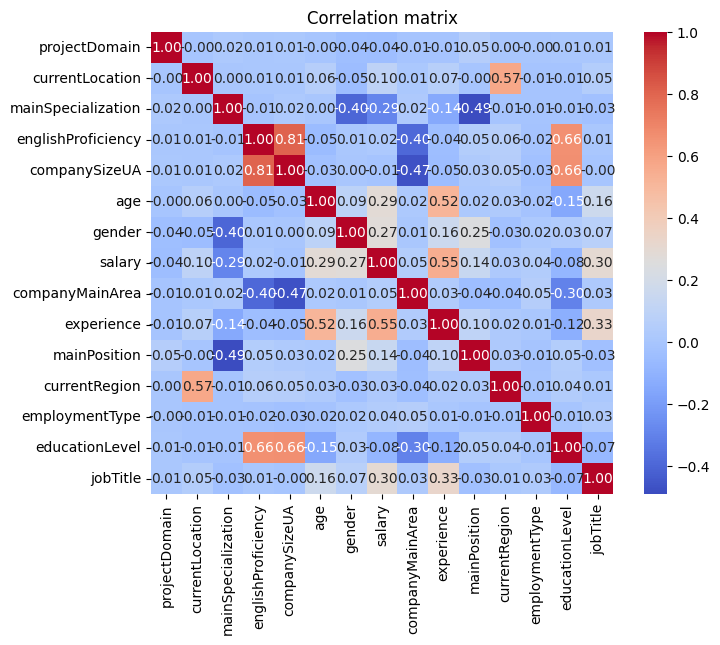

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = combined_data2.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation matrix')
plt.show()

In [36]:
# Calculate correlations of all features with salary, exclude salary itself, and sort in descending order
salary_corr = correlation_matrix['salary'].drop('salary').sort_values(ascending=False)

# Identify features with strong correlation to salary (absolute value > 0.1)
strong_corr = salary_corr[abs(salary_corr) > 0.1]
print(" Features with strong correlation to salary:")
print(strong_corr)

# Identify features with weak or no correlation to salary (absolute value <= 0.1)
weak_corr = salary_corr[abs(salary_corr) <= 0.1]
print("\n Features with weak or no correlation to salary:")
print(weak_corr)

 Features with strong correlation to salary:
experience            0.551476
jobTitle              0.296009
age                   0.288208
gender                0.272858
mainPosition          0.139962
mainSpecialization   -0.287890
Name: salary, dtype: float64

 Features with weak or no correlation to salary:
currentLocation       0.096303
companyMainArea       0.048084
employmentType        0.042673
currentRegion         0.025073
englishProficiency    0.015925
companySizeUA        -0.012981
projectDomain        -0.042812
educationLevel       -0.084981
Name: salary, dtype: float64


# Analitics

In [37]:
# Summary statistics for numerical features
combined_data[['age', 'salary','experience']].describe()

,age,salary,experience
count,37499.000000,37444.000000,37501.000000
mean,30.280941,3069.683682,4.824858
std,6.312035,2161.536993,3.603967
min,16.000000,50.000000,0.000000
25%,25.000000,1400.000000,2.000000
50%,30.000000,2600.000000,4.000000
75%,34.000000,4300.000000,7.000000
max,80.000000,36000.000000,15.000000


<ipython-input-40-25862261eae5>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_features[column], shade=True, color='skyblue')
<ipython-input-40-25862261eae5>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_features[column], shade=True, color='skyblue')
<ipython-input-40-25862261eae5>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numerical_features[column], shade=True, color='skyblue')


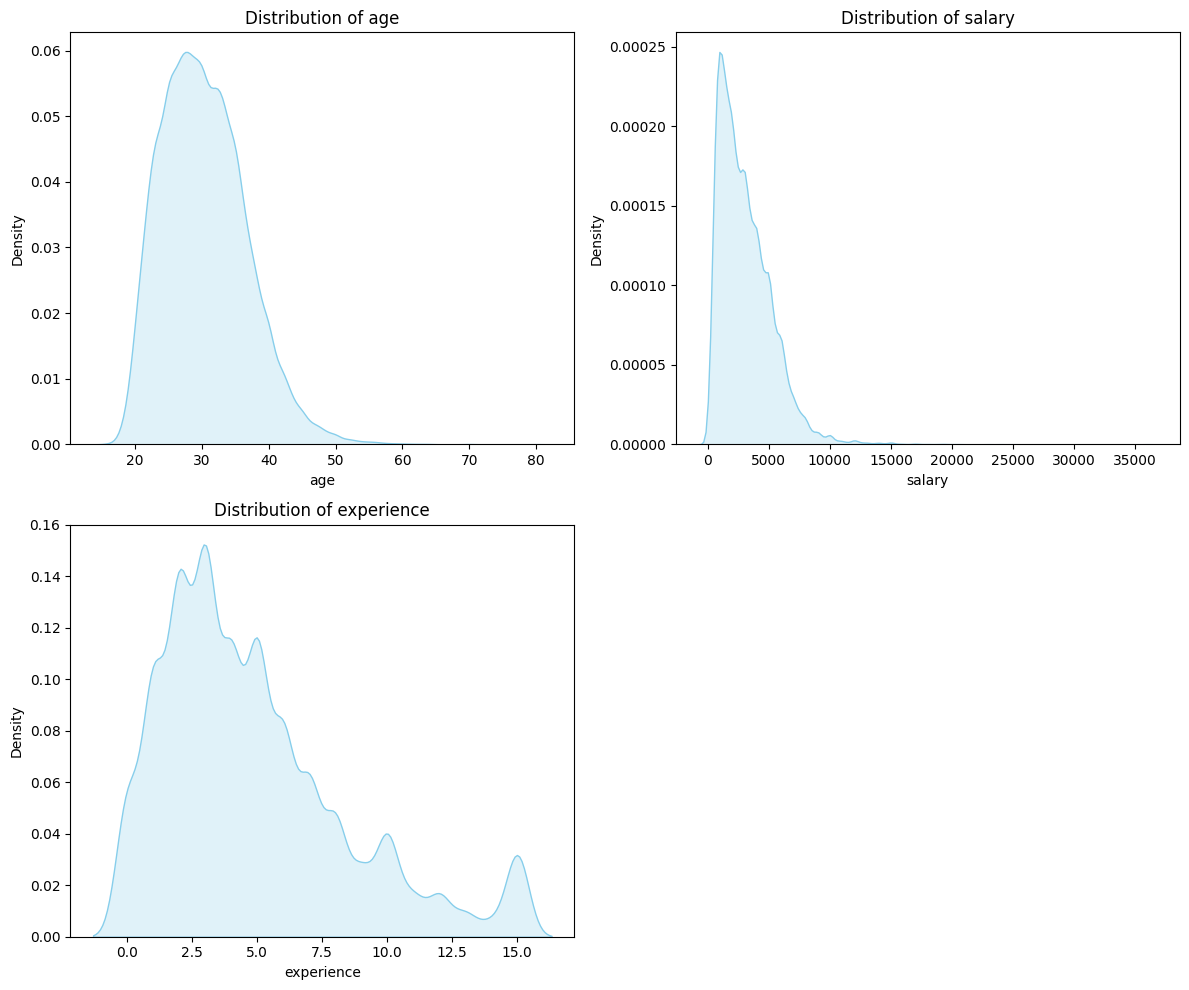

In [40]:
# Select numerical columns, create KDE plots for each to visualize their distribution
numerical_features = combined_data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(numerical_features[column], shade=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

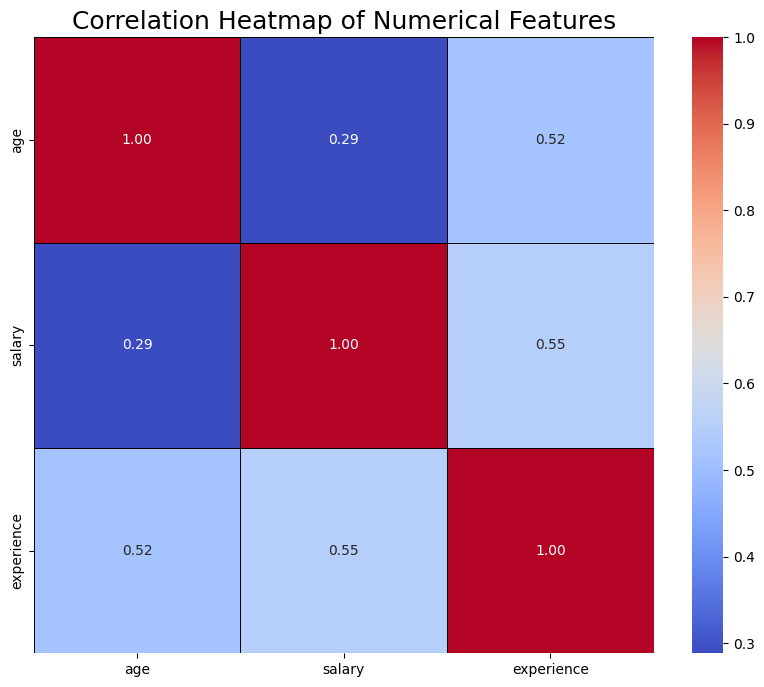

In [41]:
# Select numerical columns, compute correlation matrix, and visualize it as a heatmap
numerical_features = combined_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Show correlation values
    cmap='coolwarm',  # Color scheme
    fmt='.2f',  # Format numbers to 2 decimal places
    linewidths=0.5,  # Line width between cells
    linecolor='black'  # Line color between cells
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=18)
plt.show()

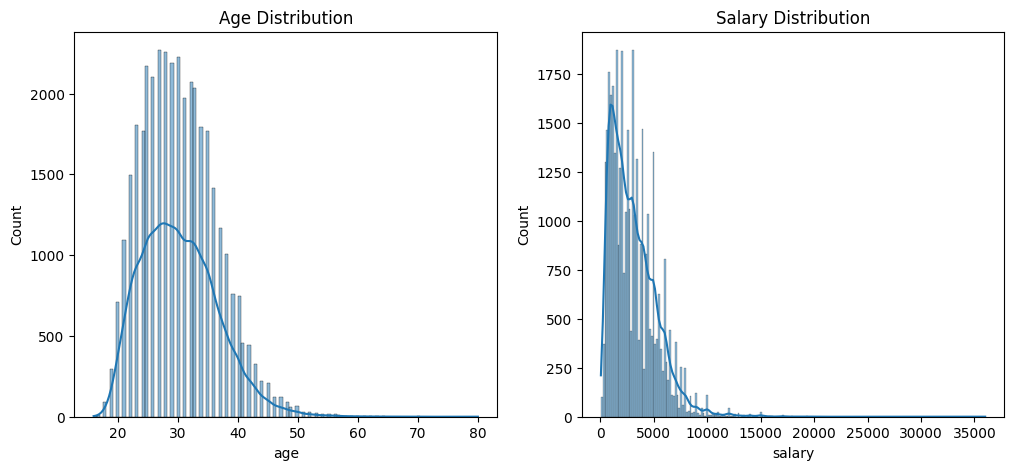

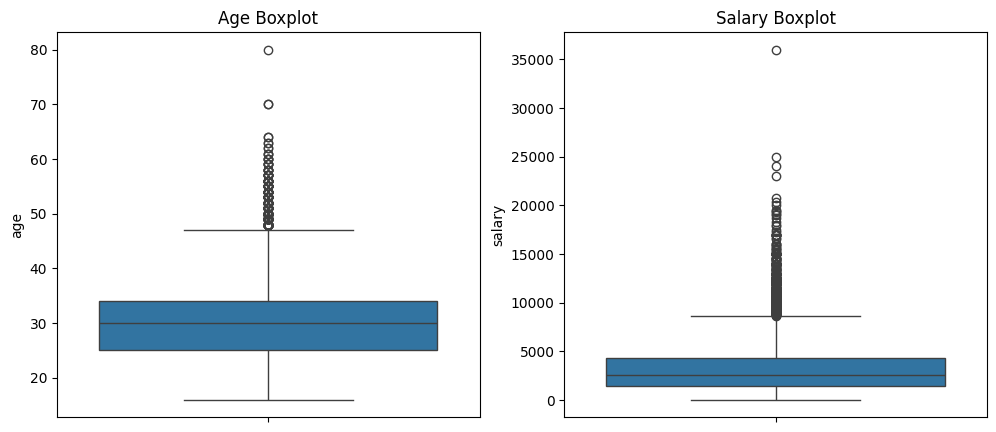

In [42]:
# histograms with KDE and boxplots for age and salary distributions
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(combined_data['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.histplot(combined_data['salary'], kde=True, ax=axes[1])
axes[1].set_title('Salary Distribution')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=combined_data['age'], ax=axes[0])
axes[0].set_title('Age Boxplot')
sns.boxplot(y=combined_data['salary'], ax=axes[1])
axes[1].set_title('Salary Boxplot')
plt.show()

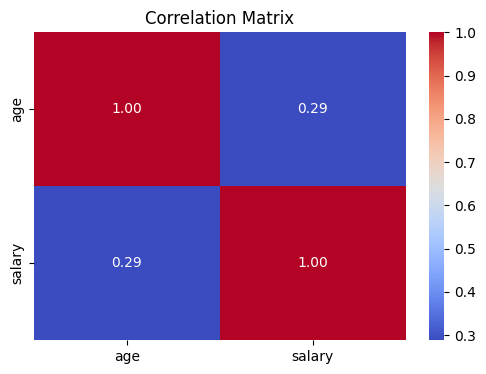

In [44]:
# Compute correlation matrix
corr_matrix = combined_data[['age', 'salary']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

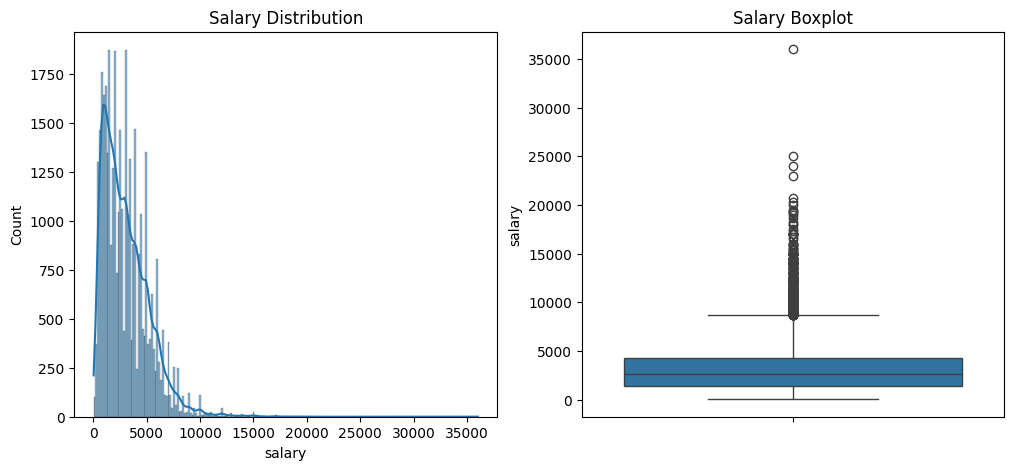

In [45]:
# Plot histogram and boxplot for salary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(combined_data['salary'], kde=True, ax=axes[0])
axes[0].set_title('Salary Distribution')

sns.boxplot(y=combined_data['salary'], ax=axes[1])
axes[1].set_title('Salary Boxplot')

plt.show()